#decouverte des donnees

In [ ]:
#importer les packages nécessaires
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#collecter les noms des fichiers (datasets)
files = [file for file in os.listdir(r'C:\Users\sella\Desktop\part1_DA_PYTON\dataP1')]
files
for file in files :
    print(file)

all_data.csv
dataP1.csv
dataP2.csv


In [ ]:
path = r'C:\Users\sella\Desktop\part1_DA_PYTON\dataP1'
all_data = pd.DataFrame()
for file in files:
    current_data = pd.read_csv(path + "/" + file)
    all_data = pd.concat([all_data, current_data])
all_data
all_data.shape

(128, 8)

In [5]:
donne1 = pd.read_csv(path + '/dataP1.csv')
donne1
donne1.shape

(32, 7)

In [ ]:
#Mettre les donnees dans un seul fichier
all_data.to_csv(path + '/all_data.csv', index=True)


In [54]:
all_data.dtypes

Date            int64
Order_ID       object
Product         int64
Quantity      float64
Unit_Price    float64
Total          object
Adresse        object
dtype: object

In [28]:
all_data.head()

,Date,Order_ID,Product,Quantity,Unit_Price,Total,Adresse
2019-04-01,1001,Widget A,10,20.5,205.0,123 Main St,City A
2019-04-01,1002,Widget B,5,15.0,75.0,456 Elm St,City B
2019-04-02,1003,Widget C,2,40.0,80.0,789 Maple Ave,City C
2019-04-02,1004,Widget A,8,20.5,164.0,101 Oak Dr,City A
2019-04-03,1005,Widget D,1,100.0,100.0,202 Pine Rd,City D


In [55]:
all_data.isnull()

,Date,Order_ID,Product,Quantity,Unit_Price,Total,Adresse
2019-04-01 10:00,False,False,False,False,False,False,False
2019-04-01 11:00,False,False,False,False,False,False,False
2019-04-02 09:30,False,False,False,False,False,False,False
2019-04-02 10:15,False,False,False,False,False,False,False
2019-04-03 14:00,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2019-04-26 08:10,False,False,False,False,False,False,False
2019-04-27 13:50,False,False,False,False,False,False,False
2019-04-28 14:30,False,False,False,False,False,False,False
2019-04-29 10:00,False,False,False,False,False,False,False


In [56]:
all_data.isnull().sum()

Date          0
Order_ID      0
Product       0
Quantity      0
Unit_Price    0
Total         0
Adresse       0
dtype: int64

In [ ]:
#Supprimer les valeurs manquantes
all_data = all_data.dropna(how='all')
all_data

,Date,Order_ID,Product,Quantity,Unit_Price,Total,Adresse
2019-04-01 10:00,1001,Widget A,10,20.5,205.0,123 Main St,City A
2019-04-01 11:00,1002,Widget B,5,15.0,75.0,456 Elm St,City B
2019-04-02 09:30,1003,Widget C,2,40.0,80.0,789 Maple Ave,City C
2019-04-02 10:15,1004,Widget A,8,20.5,164.0,101 Oak Dr,City A
2019-04-03 14:00,1005,Widget D,1,100.0,100.0,202 Pine Rd,City D
...,...,...,...,...,...,...,...
2019-04-26 08:10,1028,Widget C,2,40.0,80.0,2525 Elm St,City C
2019-04-27 13:50,1029,Widget D,1,100.0,100.0,2626 Pine Rd,City D
2019-04-28 14:30,1030,Widget B,7,15.0,105.0,2727 Cedar St,City B
2019-04-29 10:00,1031,Widget A,5,20.5,102.5,2828 Birch Ln,City A


Quel est le mois durant lequel nous avons realise le meilleur chiffre d'affaire?


In [58]:
def month(x):#extraire le mois de ladate
    return x.split('-')[1]
month('2019-04-02')

'04'

In [ ]:

all_data.columns = all_data.columns.str.strip()
all_data = all_data.loc[:, ~all_data.columns.duplicated()]
all_data['Date'] = pd.to_datetime(all_data['Date'], errors='coerce')
all_data['Month'] = all_data['Date'].dt.month
all_data
all_data['Month']


2019-04-01 10:00    1
2019-04-01 11:00    1
2019-04-02 09:30    1
2019-04-02 10:15    1
2019-04-03 14:00    1
                   ..
2019-04-26 08:10    1
2019-04-27 13:50    1
2019-04-28 14:30    1
2019-04-29 10:00    1
2000-04-30 09:00    1
Name: Month, Length: 64, dtype: int32

In [60]:
all_data['Month']
all_data['Month'].unique()

array([1], dtype=int32)

In [ ]:
all_data = all_data[all_data['Month'].notna()]
all_data['Month'].unique()

array([1], dtype=int32)

In [62]:
all_data["Month"] = all_data["Month"].astype(int)
all_data['Month'].unique()

array([1])

In [ ]:

all_data['Unit_Price'] = all_data['Unit_Price'].astype(float)
all_data['Quantity'] = all_data['Quantity'].astype(int)
all_data["Chiffre d'affaire"] = all_data['Unit_Price'] * all_data['Quantity']
all_data
all_data.groupby('Month')["Chiffre d'affaire"].sum()



Month
1    757760.0
Name: Chiffre d'affaire, dtype: float64

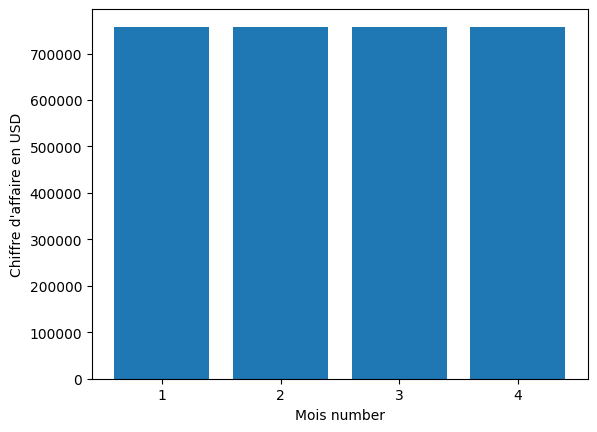

In [64]:
#visualisation pour etre plus clair
months = range(1,5)
plt.bar(months, all_data.groupby('Month')["Chiffre d'affaire"].sum())
plt.xticks(months)
plt.ylabel('Chiffre d\'affaire en USD')
plt.xlabel('Mois number')
plt.show()

Dans quelle ville nous avons enregistre un maximum de commandes ?

In [ ]:
all_data['Adresse']
'pays,city,cc'.split(',')[1]
def city(x):
    return x.split(',')[1]
all_data['city'] = all_data['Adresse']
all_data

,Date,Order_ID,Product,Quantity,Unit_Price,Total,Adresse,Month,Chiffre d'affaire,city
2019-04-01 10:00,1970-01-01 00:00:00.000001001,Widget A,10,20,205.0,123 Main St,City A,1,4100.0,City A
2019-04-01 11:00,1970-01-01 00:00:00.000001002,Widget B,5,15,75.0,456 Elm St,City B,1,1125.0,City B
2019-04-02 09:30,1970-01-01 00:00:00.000001003,Widget C,2,40,80.0,789 Maple Ave,City C,1,3200.0,City C
2019-04-02 10:15,1970-01-01 00:00:00.000001004,Widget A,8,20,164.0,101 Oak Dr,City A,1,3280.0,City A
2019-04-03 14:00,1970-01-01 00:00:00.000001005,Widget D,1,100,100.0,202 Pine Rd,City D,1,10000.0,City D
...,...,...,...,...,...,...,...,...,...,...
2019-04-26 08:10,1970-01-01 00:00:00.000001028,Widget C,2,40,80.0,2525 Elm St,City C,1,3200.0,City C
2019-04-27 13:50,1970-01-01 00:00:00.000001029,Widget D,1,100,100.0,2626 Pine Rd,City D,1,10000.0,City D
2019-04-28 14:30,1970-01-01 00:00:00.000001030,Widget B,7,15,105.0,2727 Cedar St,City B,1,1575.0,City B
2019-04-29 10:00,1970-01-01 00:00:00.000001031,Widget A,5,20,102.5,2828 Birch Ln,City A,1,2050.0,City A


In [66]:
all_data.groupby('city')['city'].count()

city
City A    18
City B    16
City C    16
City D    14
Name: city, dtype: int64

In [67]:
all_data.groupby('city')['city'].count().index

Index([' City A', ' City B', ' City C', ' City D'], dtype='object', name='city')

In [68]:
all_data.groupby('city')['city'].count().values

array([18, 16, 16, 14])

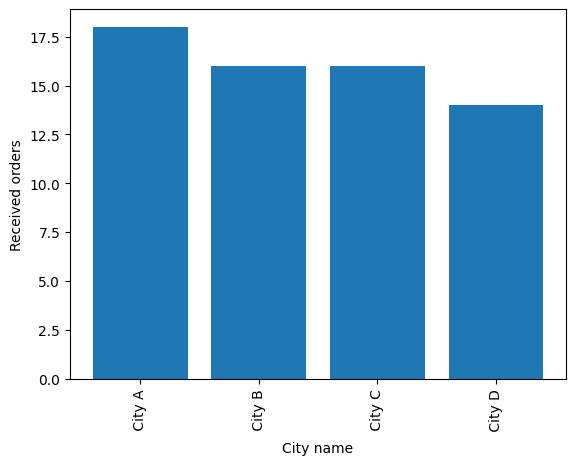

In [69]:
#visualisation pour etre plus clair
plt.bar(all_data.groupby('city')['city'].count().index, all_data.groupby('city')['city'].count().values)
plt.xticks(rotation='vertical')
plt.ylabel('Received orders')
plt.xlabel('City name')
plt.show()

En quelle moment doit on faire une compagne publicitaire pour avoir plus de ventes?

In [ ]:

dataP3 = pd.read_csv(path + '/dataP3.csv')
dataP3
dataP3["Date_Heure"]
dataP3['Hour'] = pd.to_datetime(dataP3['Date_Heure']).dt.hour
dataP3['Hour']
dataP3

,Commande_ID,Date_Heure,Article,Quantite,Prix_Unitaire,Total,Paiement,Client_ID,Reduction,Hour
0,101,2024-11-05 10:15:32,Lunettes de soleil,2,59.99,119.98,Carte de crédit,1,0,10
1,102,2024-11-05 11:45:10,Lentilles de contact,3,20.00,60.00,Chèque,2,5,11
2,103,2024-11-05 13:22:45,Nettoyant pour lunettes,1,12.50,12.50,Liquide,3,0,13
3,104,2024-11-06 09:08:12,Lunettes de vue,1,199.99,199.99,Carte de crédit,4,10,9
4,105,2024-11-06 14:18:27,Etui à lunettes,4,9.99,39.96,Liquide,5,0,14
5,106,2024-11-06 16:34:50,Lentilles de contact,2,20.00,40.00,Carte de crédit,6,0,16
6,107,2024-11-07 08:10:05,Produit d'entretien,5,5.00,25.00,Liquide,7,0,8
7,108,2024-11-07 15:45:33,Lunettes de soleil,1,59.99,59.99,Chèque,8,5,15
8,109,2024-11-08 12:12:12,Monture,2,150.00,300.00,Carte de crédit,9,15,12
9,110,2024-11-08 18:25:45,Lunettes de vue,1,199.99,199.99,Liquide,10,0,18


In [ ]:
keys = []
hours = []
for key , hour in dataP3.groupby('Hour'):
    keys.append(key) # le nombre de fois que cette boucle se repete
    hours.append(len(hour))
    
keys 
hours
    

([8, 9, 10, 11, 12, 13, 14, 15, 16, 18], [1, 2, 2, 2, 1, 2, 1, 2, 1, 1])

Text(0, 0.5, 'Nombre de commandes')

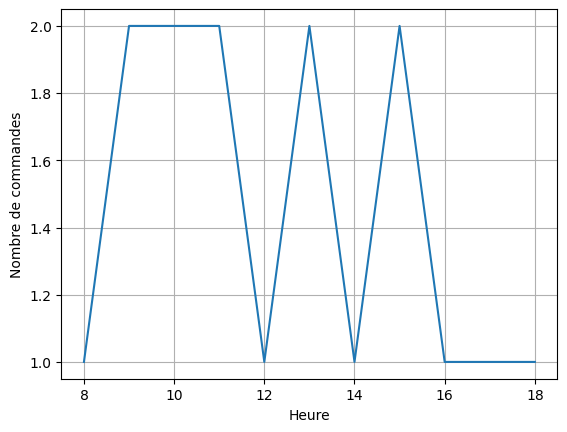

In [25]:
plt.grid()
plt.plot(keys, hours)
plt.xlabel('Heure')
plt.ylabel('Nombre de commandes')

Quel produit se vend le plus?

<Axes: xlabel='Article'>

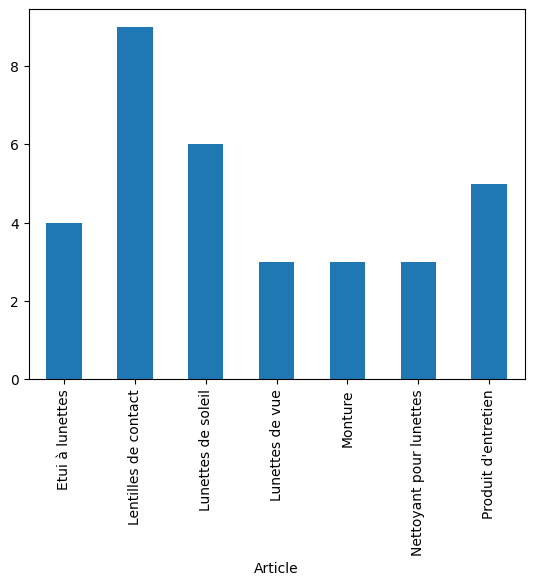

In [28]:
#video 5
dataP3.groupby('Article')['Quantite'].sum().plot(kind='bar')

In [30]:
dataP3.groupby('Article')['Prix_Unitaire'].mean()

Article
Etui à lunettes              9.99
Lentilles de contact        20.00
Lunettes de soleil          59.99
Lunettes de vue            199.99
Monture                    150.00
Nettoyant pour lunettes     12.50
Produit d'entretien          5.00
Name: Prix_Unitaire, dtype: float64

In [31]:
products = dataP3.groupby('Article')['Quantite'].sum().index
quantity = dataP3.groupby('Article')['Quantite'].sum()
prices = dataP3.groupby('Article')['Prix_Unitaire'].mean()


C:\Users\sella\AppData\Local\Temp\ipykernel_6808\2979710049.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


[Text(0, 0, 'Etui à lunettes'),
 Text(1, 0, 'Lentilles de contact'),
 Text(2, 0, 'Lunettes de soleil'),
 Text(3, 0, 'Lunettes de vue'),
 Text(4, 0, 'Monture'),
 Text(5, 0, 'Nettoyant pour lunettes'),
 Text(6, 0, "Produit d'entretien")]

<Figure size 4000x2400 with 0 Axes>

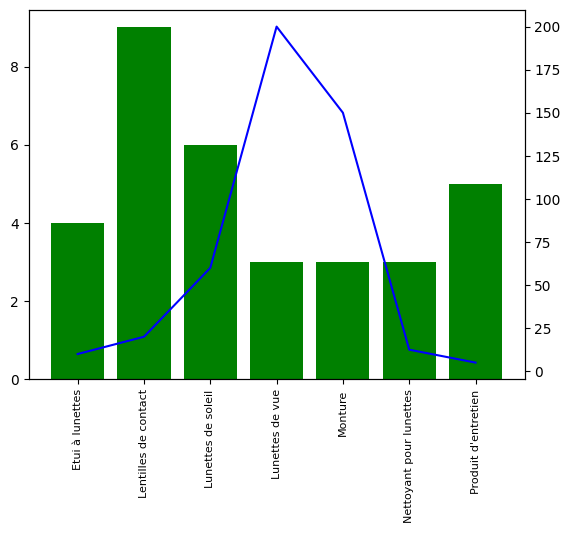

In [32]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

In [ ]:

df = dataP3[dataP3['Commande_ID'].duplicated(keep=False)]


In [38]:
df2= df.drop_duplicates(subset=['Commande_ID'])
df2['Grouped'] = df.groupby('Commande_ID')['Article'].transform(lambda x: ','.join(x))